# Lambda Ausdrücke und funktionale Programmierung

#### Marcel Lüthi <br/> Departement Mathematik und Informatik

# Agenda

* Geschichte: Objektorientierte und Funktionale Programmierung
* Funktionen als Objekte
* Lambda Audrücke in Java
* Funktionsobjekte in Java Standardbibliothek


# Geschichte:  Objektorientierte und Funktionale Programmierung

# Erste Programmierung

```assembly
SUMDIGIN CSECT
         USING  SUMDIGIN,R13       
         B      72(R15)            
         DC     17F'0'             
         STM    R14,R12,12(R13)    
         ST     R13,4(R15)         
         ST     R15,8(R13)         
         LR     R13,R15            
         LA     R11,NUMBERS        
         LA     R8,1               
LOOPK    CH     R8,=H'4'           
         BH     ELOOPK             
         SR     R10,R10            
         LA     R7,1               
LOOPJ    CH     R7,=H'8'           
         BH     ELOOPJ             
         LR     R4,R11             
         BCTR   R4,0               
         AR     R4,R7              
         MVC    D,0(R4)            
         SR     R9,R9              
         SR     R6,R6              
LOOPI    CH     R6,=H'15'          
         BH     ELOOPI             
         LA     R4,DIGITS          
         AR     R4,R6              
         MVC    C,0(R4)            
         CLC    D,C                
         BNE    NOTEQ              
         LR     R9,R6              
         B      ELOOPI             
NOTEQ    LA     R6,1(R6)           
         B      LOOPI              
ELOOPI   AR     R10,R9             
         LA     R7,1(R7)           
         B      LOOPJ              
ELOOPJ   MVC    PG(8),0(R11)       
         XDECO  R10,XDEC           
         MVC    PG+8(8),XDEC+4     
         XPRNT  PG,L'PG            
         LA     R11,8(R11)         
         LA     R8,1(R8)           
         B      LOOPK              
ELOOPK   L      R13,4(0,R13)       
         LM     R14,R12,12(R13)    
         XR     R15,R15            
         BR     R14                
DIGITS   DC     CL16'0123456789ABCDEF'
NUMBERS  DC     CL8'1',CL8'1234',CL8'FE',CL8'F0E'
C        DS     CL1
D        DS     CL1
PG       DC     CL16' '            
XDEC     DS     CL12               
         YREGS
         END    SUMDIGIN
```

# Erste Hochsprachen

```modula
MODULE SumOFDigits;
FROM STextIO IMPORT
  WriteString, WriteLn;
FROM SWholeIO IMPORT
  WriteInt;
FROM Conversions IMPORT
  StrBaseToLong;
 
PROCEDURE SumOfDigitBase(N: LONGCARD; Base: CARDINAL): CARDINAL;
VAR
  Tmp, LBase: LONGCARD;
  Digit, Sum : CARDINAL;
BEGIN
  Digit := 0;
  Sum   := 0;
  LBase := Base;
  WHILE N > 0 DO
    Tmp := N / LBase;
    Digit := N - LBase * Tmp;
    N := Tmp;
    INC(Sum, Digit);
  END;
  RETURN Sum;
END SumOfDigitBase;
 
VAR
  Num: LONGCARD;
 
BEGIN
  WriteString('   1 sums to '); 
  WriteInt(SumOfDigitBase(1, 10), 1); 
  WriteLn;
  WriteString('1234 sums to '); 
  WriteInt(SumOfDigitBase(1234, 10), 1); 
  WriteLn;
  IF StrBaseToLong('FE', 16, Num) THEN
    WriteString(' $FE sums to '); 
    WriteInt(SumOfDigitBase(Num, 16), 1); 
    WriteLn;
  END;
  IF StrBaseToLong('F0E', 16, Num) THEN
    WriteString('$F0E sums to '); 
    WriteInt(SumOfDigitBase(Num, 16), 1); 
    WriteLn;
  END;
  WriteString('MAX(LONGCARD) (in dec) sums to '); 
  WriteInt(SumOfDigitBase(MAX(LONGCARD), 10), 1); 
  WriteLn;
END SumOFDigits.
```

# Wichtige Frage


> Wie kann man Programme besser strukturieren?

<div style="float:left; width:50%; text-align:left">
    <h3>Funktionale Programmiereung</h3>
    <ul>
        <li> Idee: Komposition von (mathematischen) Funktionen um aus einfachen Teilen komplexe Funktionalität zu bauen </li>
        <li> Mathematische Grundlage: Lambdakalkül</li>
        <li> Aktionen / Berechnungen im Zentrum </li>
    </ul>
</div>
<div style="float:right; width:50%">
    <h3>Objektorientierte Programmiereung</h3>
    <ul>
        <li> Idee: Organisation von Code in "selbstorganisierende" Module (Objekte)</li>        
        <li> Management von Zustand durch Kapselung </li>
        <li> Objekte im Zentrum </li>        
    </ul>

</div>

> Konzepte entwickelt in 60 und 70er Jahren

# Objektorientierte Programmierung

* Durchbruch in der Industrie: 90er Jahre. 
    * Zustandsmanagement in GUIs

![win32](./images/win31.png)


# Funktionale Programmierung

* Durchbruch in der Industrie: 2010er Jahre 
    * Parallelisierung / Multi-core computing

![moores law](images./moores-law.png)

# Seiteneffekte


```
   int x = 0; 
   int incrementX() { return ++x; } 
   int decrementX() { return --x; }  
```

- ```decrementX()``` hängt davon ab, wie häufig ich zuvor ```incrementX()``` und ```decrementX()``` aufgerufen habe.
- Zustandsverwaltung ist immer komplex!
    - Schlimm bei paralleler Ausführung, da Reihenfolge nicht immer deterministisch ist.



# Seiteneffekte: Beispiel

* Rückgabewert von decrementX hängt davon ab wie häufig ich ```decrementX``` aufgerufen habe.
* Simulation: Separater Thread ruft decrement auf.

In [58]:
 int x = 0; 
 int incrementX() { return ++x; } 
 int decrementX() { return --x; } 

In [59]:
Runnable r = new Runnable() {

    public void run() {
        for (int i = 0; i < 100; ++i) {
            try {
                Thread.sleep(1000);
            } catch (Exception e) {}
            decrementX();
        }
    }
};

new Thread(r).start();

In [61]:
incrementX();

-27


# Seiteneffektfreie Programmierung
```
  int increment(int x) { return x + 1; } 
  int decrement(int x) { return x - 1; }
```

- ```decrement(5)``` ist immer 4, unabhängig vom Kontext 
- Funktionen im mathematischen Sinn

> Codeverständnis und Parallelisierung werden einfacher

# Funktionale Konstrukte in Java

> Moderne Programmiersprachen integrieren Konzepte von Funktionalen Sprachen:

* Funktionen als Argumente 
* Anonyme Funktionen
* (Closures)

# Funktionen und Objekte

# Funktionsobjekte


> Idee: Funktionen sind (seiteneffektfreie) Objekte mit nur einer Methode


#### Implementationsstrategie

1. Deklaration: Interface für Funktionen definieren
```java
interface Function {     
    int apply(int x);
}
```

2. Definition der Funktion: Anonymes Objekt erstellen 

```java
Function square = new Function() {
    public int apply(int x) { return x * x; }
}
```

# Funktionsobjekte

* Übung: Erstellen Sie eine Funktion ```times2``` die ein Argument mit zwei multipliziert
    * Führen Sie diese aus.
    * Schreiben Sie auch eine Funktion, die Argumente vom Typ ```Double``` nimmt.

In [62]:
interface Function {     
     double apply(double x);
};

Function times2 = new Function() {
    public double apply(double x) { return 2 * x; }
};

times2.apply(3);

6

# Funktionsobjekte selber erstellen

#### Problem
*  Ein Interface für jede Art von Funktion
     
    ```java
    interface FunctionIntString {
       int apply(String x); 
    }
    interface FunctionDoubleString { 
        double apply(String x);
    }
    ...
}
```

#### Lösung
* Generics

# Generische Funktionsobjekte

* Java Generics helfen uns die Funktion nur einmal zu definieren

In [63]:
interface Function<T, R> {     
    R apply(T x);
}



Function<Double, Double> square = new Function<>() { 
    public Double apply(Double x) {
        return x * x;
    }
}

# Anwendungsbeispiel: Funktionen plotten (1)

* Funktionenplotter aus der AWT Vorlesung

![function plotter](images/awt-function-plotter.png)

# Anwendungsbeispiel: Funktionen plotten (2)

![plotter](./images/function-plotter.png)

# Anwendungsbeispiel: Funktionen plotten (3)

#### Vorbereitung

* Um in Jupyter Notebooks plotten zu können brauchen wir die Bibliothek xchart
* Kann in Jupyter mit ```%maven Bibliotheksname``` importiert werden
    * ```%maven``` ist Jupiter und nicht java code

In [64]:
// importieren einer Bibliothek in Jupyter
%maven org.knowm.xchart:xchart:3.5.2
    
// import der wichtigen packages (java)
import org.knowm.xchart.*;
import java.awt.image.BufferedImage;

# Anwendungsbeispiel: Funktionen plotten (4)

#### Plot Funktionalität

* Funktion plot wertet Funktion an Datenpunkten ```xs``` aus und plottet die Werte.

In [65]:
BufferedImage plot(double[] xs, Function<Double, Double> f) { 
    double[] ys = new double[xs.length];
    for (int i = 0; i < xs.length; ++i) {
        ys[i] = f.apply(xs[i]);
    }
    XYChart chart = QuickChart.getChart("Sample Chart", "X", "Y", "y(x)", xs, ys);
    return BitmapEncoder.getBufferedImage(chart);    
};


# Anwendungsbeispiel: Funktionen plotten (5)

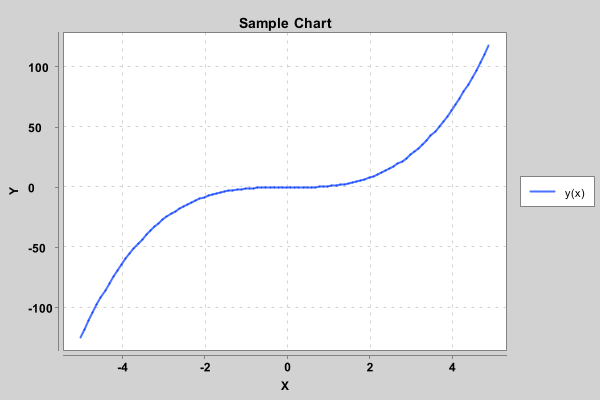

In [66]:
Function<Double, Double> cubic = new Function<>() { 
    public Double apply(Double x) { return x * x * x; } 
};

double[] xs = new double[100];
for (int i = 0; i < 100; ++i) {xs[i] = (i - 50) / 10.0; }
plot(xs, cubic);

* Übung: Plotten Sie verschiedene Funktionen

# Lambda Ausdrücke

# Lambda Ausdrücke

* Java hat eine spezielle Syntax definiert um Funktionsobjekte zu erstellen. 
* Bekannt als ```lambda Ausdrücke```

> Parameter -> Ausdruck

#### Beispiel
```java
x -> x * x
```

# Lambda Syntax

```bnf
lambda = ArgList "->" Body
ArgList = Identifier 
         | "(" [Type] Identifier { "," [Type] Identifier } ")" 
         | "()" 
Body = Expression   |  "{" [ Statement ";" ]+ "}"
```

# Functional Interface

* Ein *Functional Interface* ist ein Interface oder Abstrakte Klasse mit genau eine Methode
    * Methode entspricht "Berechnung" der Funktion

### Beispiel:
```java
interface Function<T, R> {
    R apply(T t);
}
```

* Lambda Ausdrücke können an ein *Functional Interface* zugewiesen werden.
   * Lambdas bekommen einen Namen
   
```
Function<Double, Double> f = (Double d) -> d * d;
```

# Lambdas als Methodenargumente

* Wir können Lambdas an Methoden Übergeben:

```java
void aMethod(Function<Double, Double> f) {
    f.apply(0.1)
}
```


#### Plotten mit Lambdas

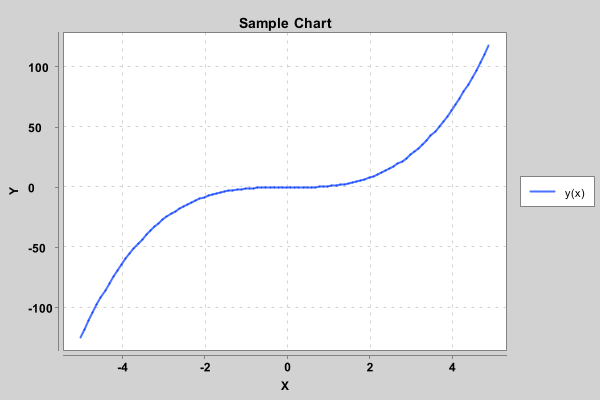

In [72]:
plot(xs, (Double x) -> x * x  *x );

# Lambdas als Rückgabewerte

* Methoden können Funktionen zurückgeben.

```
Function<Double, Double> doubleFun(Double x) {
    return x -> x * x;
}
```




#### Übung: 

* Schreiben Sie eine Methode, die eine Funktion f vom Typ Function<Double, Double> als Argument nimmt, und eine Funktion zurückgibt, die diese zwei mal hintereinander anwendet, also der Funktion $x \mapsto f(f(x))$ entspricht
* Können Sie diese als generische Funktion schreiben?

In [80]:
Function<Double, Double> doubleFun(Function<Double, Double> f) {
    return (Double x) -> f.apply(f.apply(x));
}

Function<Double, Double> fourTimesFun = doubleFun( x -> 2 * x);

fourTimesFun.apply(5.0)

20.0

# Lambdas mit Anweisungsblock

* Rechte Seite von Lambda Ausdruck kann beliebiger Block sein
    * Block muss den richtigen Typ zurückliefern


Folgendes funktioniert:

In [85]:
Function<String, Integer> f = (String s) -> { 
    System.out.println(s); 
    return Integer.parseInt(s);
};
f.apply("5");

5


5

Aber hier gibt es einen Typfehler

In [86]:
Function<String, Integer> f = (String s) -> { 
    System.out.println(s); 
    return s;
}

CompilationException: 

# Methodenreferenzen

* Wir können Methoden Functional Interfaces zuweisen:

```java
Function<Double, Double> f = AClass::aMethod;
```

#### Beispiel


In [87]:
Function<Double, Double> cos = Math::cos;
cos.apply(1.0);

0.5403023058681398

# Funktionsobjekte mit mehreren Argumenten

* Idee funktioniert für Funktionen mit beliebig vielen Argumenten

In [92]:
interface Function2<S, T, R> {
    R apply(S s, T t);
}

Function2<Double, Double, Double> sum = (x, y) -> x + y;

Function2<Double, Double, String> sumAsString = (x, y) -> new Double(x + y).toString();

sumAsString.apply(3.0, 5.0)

8.0

# Prädikate

> Prädikat: Ein Funktionsobjekt das True oder False zurückgibt

```
interface Predicate<T>
    boolean test(T x);
}
```



# Prädikat: Beispiel

In [95]:
interface Predicate<T> { 
    boolean test(T x);
}

double[] array = {0.1, 0.7, -0.5, 1.0};

// returns the number of elements, which have the property specified by Predicate pred
int count(double[] array, Predicate<Double> pred) {
  
    int counter = 0;
    
    for (int i = 0; i < array.length; ++i) {
        if (pred.test(array[i]) == true) {
            counter += 1;
        }
    }
    
    return counter;
}

count(array, x -> x > 0.0);

3

### Übung: 
* Implementieren Sie die Methode
* Testen Sie diese mit verschiedenen Prädikaten

# Seitenbemerkung: Sind Lambda's anonyme Innerklassen?

* Erste Implementationen von Lambda Ausdrücken waren nur "Syntactic Sugar".

Ausdruck:

```
Function f  = x -> x*x ;
```
wurde ersetzt durch 
```` 
f  = new Function() {
    int exec (int x) { return x*x; }   
}   
```

> Heute sind die Details etwas komplizierter. 
> * Effiziente Implementation - direkt unterstützt durch JVM

# Funktionsobjekte in der Java Standardbibliothek

* Standard Funktionstypen sind in [Java API Dokumentation](https://docs.oracle.com/javase/8/docs/api/) definiert:

![images](./images/function-api.png)


# Sourcecode vom Java Funktionsinterface

In [ ]:
public interface Function<T, R> {

    R apply(T t);

    default <V> Function<V, R> compose(Function<? super V, ? extends T> before) {
        Objects.requireNonNull(before);
        return (V v) -> apply(before.apply(v));
    }

    default <V> Function<T, V> andThen(Function<? super R, ? extends V> after) {
        Objects.requireNonNull(after);
        return (T t) -> after.apply(apply(t));
    }

    static <T> Function<T, T> identity() {
        return t -> t;
    }
}

# Komposition und Identität

#### Übung: 

* Versuchen Sie verschiedene Funktionen mit ```compose``` zu kombinieren

# Sourcecode vom Java Predicate

In [ ]:
public interface Predicate<T> {

    boolean test(T t);
    
    default Predicate<T> and(Predicate<? super T> other) {
        Objects.requireNonNull(other);
        return (t) -> test(t) && other.test(t);
    }

    default Predicate<T> negate() {
        return (t) -> !test(t);
    }

    default Predicate<T> or(Predicate<? super T> other) {
        Objects.requireNonNull(other);
        return (t) -> test(t) || other.test(t);
    }

    static <T> Predicate<T> isEqual(Object targetRef) {
        return (null == targetRef)
                ? Objects::isNull
                : object -> targetRef.equals(object);
    }
}


#### Übung:

* Versuchen Sie verschiedene Prädikate mit ```and``` ```or```und ```negate``` zu kombinieren